# Traffy Fondue data
This file works on data downloaded from the chadchart traffy website

In [2]:
# setup pandas and read the csv file

import pandas as pd
import numpy as np

df_import = pd.read_csv('teamchadchart_dec_12_2022.csv')

print(df_import.shape)
print(df_import.columns)

(100000, 12)
Index(['ticket_id', 'type', 'organization', 'comment', 'coords', 'photo',
       'address', 'district', 'subdistrict', 'province', 'timestamp', 'state'],
      dtype='object')


In [13]:
# enabling full column display
pd.set_option('display.max_columns', None)

df_import.tail()

date = pd.Timestamp('2022-07-12 09:51:53.852474+00')
date.date().month

7

# Language support
This section will translate the types, organization, status, and city region and location names.

In [77]:
type = {
    'อื่นๆ':'Other',
    'ถนน':'Road',
    'ทางเท้า':'Sidewalk',
    'น้ำท่วม':'Flood',
    'แสงสว่าง':'Light',
    'ความปลอดภัย':'Safety',
    'ความสะอาด':'Cleanliness',
    'ท่อระบายน้ำ':'Drain',
    'สะพาน':'Bridge',
    'กีดขวาง':'Obstruction',
    'จราจร':'Traffic',  
    'สายไฟ':'Electric Wires',
    'คลอง':'Canal',
    'ต้นไม้':'Tree',
    'เสียงรบกวน':'Noise',
    'สัตว์จรจัด':'Stray animals',
    'ป้าย':'Signage',
    'ร้องเรียน':'Complaint',
    'เสนอแนะ':'Suggestion',
    'คนจรจัด':'Homeless',
    'การเดินทาง':'Journey',
    'สอบถาม':'Inquiry',
    'ห้องน้ำ':'Bathroom',
    'PM2.5':'PM2.5',
    'ป้ายจราจร':'Traffic Signs'
}

#state should be the same as status
state = {
    'ส่งเรื่องแล้ว':'Submitted',
    'กำลังดำเนินการ':'In progress',
    'เสร็จสิ้น':'finish',
    'ส่งต่อ(ใหม่)':'Forward(New)',
    'ของบประมาณ':'Ask for a budget.',
    'รอรับเรื่อง':'Waiting to get the story.',
    'ไม่เกี่ยวข้อง':'Irrelevant.'
}

statelistkey = list(state)
print(statelistkey[0])

ส่งเรื่องแล้ว


In [78]:
df_import.columns

Index(['ticket_id', 'type', 'organization', 'comment', 'coords', 'photo',
       'address', 'district', 'subdistrict', 'province', 'timestamp', 'state'],
      dtype='object')

In [79]:
# extract only the columns needed for analysis
df_traffycol = df_import[["ticket_id", "timestamp", "state", "type", "coords"]]
df_traffycol.head()

,ticket_id,timestamp,state,type,coords
0,2022-MPNV4C,2022-12-12 10:37:30.924196+00,รอรับเรื่อง,ทางเท้า,"100.61019,13.68130"
1,2022-L3WBAX,2022-12-12 10:35:01.410448+00,รอรับเรื่อง,NaN,"100.55931,13.72024"
2,2022-C3NR9L,2022-12-12 10:33:37.655019+00,รอรับเรื่อง,NaN,"100.80035,13.75550"
3,2022-A6TF69,2022-12-12 10:32:52.165067+00,รอรับเรื่อง,"ต้นไม้,ห้องน้ำ","100.66119,13.68749"
4,2022-MAMPBE,2022-12-12 10:27:23.253628+00,รอรับเรื่อง,ความปลอดภัย,"100.55660,13.73383"


In [80]:
#add a typecode column and a statuscode column and in star and count_reopen change NaN to 0
#add statuscode and typecode column
statuscode = []
for s in df_traffycol.loc[:,"state"]:
       if s in state:
              indexvalue = statelistkey.index(s)
              statuscode.append(indexvalue)
       else:
              statuscode.append(-1)


#print(statuscode)
df_traffycol["statuscode"]= statuscode

# Add empty column with translated name of type
#print(df_traffycol['type'].value_counts())
for t in type:
#       print("key: ", t, " English: ", type[t])
#       print(df_traffycol['type'].str.contains(t).value_counts())
       #add empty col with new colname
       df_traffycol[type[t]]= 0


#add a status code column assign na
df_traffycol['statuscode']= np.nan
df_traffycol.columns

/var/folders/r9/s9f9f5cj77l7qzjyd8t03b1h0000gn/T/ipykernel_45790/1078609210.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traffycol["statuscode"]= statuscode
/var/folders/r9/s9f9f5cj77l7qzjyd8t03b1h0000gn/T/ipykernel_45790/1078609210.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traffycol[type[t]]= 0
/var/folders/r9/s9f9f5cj77l7qzjyd8t03b1h0000gn/T/ipykernel_45790/1078609210.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

Index(['ticket_id', 'timestamp', 'state', 'type', 'coords', 'statuscode',
       'Other', 'Road', 'Sidewalk', 'Flood', 'Light', 'Safety', 'Cleanliness',
       'Drain', 'Bridge', 'Obstruction', 'Traffic', 'Electric Wires', 'Canal',
       'Tree', 'Noise', 'Stray animals', 'Signage', 'Complaint', 'Suggestion',
       'Homeless', 'Journey', 'Inquiry', 'Bathroom', 'PM2.5', 'Traffic Signs'],
      dtype='object')

In [81]:
df_traffycol = df_traffycol.rename(columns={'electric wires': 'Electric Wires'})

In [82]:
df_traffycol.head()

,ticket_id,timestamp,state,type,coords,statuscode,Other,Road,Sidewalk,Flood,Light,Safety,Cleanliness,Drain,Bridge,Obstruction,Traffic,Electric Wires,Canal,Tree,Noise,Stray animals,Signage,Complaint,Suggestion,Homeless,Journey,Inquiry,Bathroom,PM2.5,Traffic Signs
0,2022-MPNV4C,2022-12-12 10:37:30.924196+00,รอรับเรื่อง,ทางเท้า,"100.61019,13.68130",NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2022-L3WBAX,2022-12-12 10:35:01.410448+00,รอรับเรื่อง,NaN,"100.55931,13.72024",NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2022-C3NR9L,2022-12-12 10:33:37.655019+00,รอรับเรื่อง,NaN,"100.80035,13.75550",NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2022-A6TF69,2022-12-12 10:32:52.165067+00,รอรับเรื่อง,"ต้นไม้,ห้องน้ำ","100.66119,13.68749",NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2022-MAMPBE,2022-12-12 10:27:23.253628+00,รอรับเรื่อง,ความปลอดภัย,"100.55660,13.73383",NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [83]:
# code the type string into values in translated type columns
nrows = df_traffycol.shape[0]
for index in range(nrows):#df_traffycol['type'].index:
    try:
        typestring = df_traffycol['type'].iloc[index]
    except IndexError:
        print("Index error - Index: "+ str(index))
    try:
        tstring = typestring.split(",")
    except AttributeError:
        typestring = "Unknown"
        tstring = "Unknown"
    #print(tstring)
    if tstring != "Unknown":
        for t in tstring:
            if t in typestring:
                df_traffycol[type[t]].iloc[index] = 1
        #        print("TRUE type: "+type[t]+" t: "+t)
            else:
                df_traffycol[type[t]].iloc[index] = 0
        #        print("FALSE type: "+type[t]+" t: "+t)
            #df_traffycol[type[t]] = found
        #print("idex: "+str(index))
        #print(df_traffycol.iloc[index])
        if df_traffycol['state'].iloc[index] in state:
            df_traffycol['statuscode'].iloc[index]= statelistkey.index(df_traffycol['state'].iloc[index])
    
    #

/var/folders/r9/s9f9f5cj77l7qzjyd8t03b1h0000gn/T/ipykernel_45790/2612461318.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traffycol[type[t]].iloc[index] = 1
/var/folders/r9/s9f9f5cj77l7qzjyd8t03b1h0000gn/T/ipykernel_45790/2612461318.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traffycol['statuscode'].iloc[index]= statelistkey.index(df_traffycol['state'].iloc[index])


In [93]:
# reduce to columns for analysis
df_traffy = df_traffycol[['timestamp',  
       'Other', 'Road', 'Sidewalk', 'Flood', 'Light', 'Safety', 'Cleanliness',
       'Drain', 'Bridge', 'Obstruction', 'Traffic', 'Electric Wires', 'Canal',
       'Tree', 'Noise', 'Stray animals', 'Signage', 'Complaint', 'Suggestion',
       'Homeless', 'Journey', 'Inquiry', 'Bathroom', 'PM2.5', 'Traffic Signs', 'coords']]

# set the date in timestamp column
df_traffy['timestamp'] = pd.to_datetime(df_traffy['timestamp']).dt.date
df_traffy['month'] = pd.DatetimeIndex(df_traffy['timestamp']).month

typelist = ['Other', 'Sidewalk', 'Flood', 'Light', 'Safety', 'Cleanliness',
       'Drain', 'Bridge', 'Obstruction', 'Traffic', 'Electric Wires', 'Canal',
       'Tree', 'Noise', 'Stray animals', 'Signage', 'Complaint', 'Suggestion',
       'Homeless', 'Journey', 'Inquiry', 'Bathroom', 'PM2.5', 'Traffic Signs']

def report_type(tlist):
    newcolname = str(tlist).lower()
    df = df_traffy.groupby(['month',tlist])[tlist].sum().reset_index(name=newcolname)
    df = df[df[newcolname] != 0] #remove rows where road is 0
    df = df.drop([tlist], axis=1)
    return df

df_types = df_traffy.groupby(['month','Road'])['Road'].sum().reset_index(name='road')
#df_road = df_road['road']
print(df_types)
df_types = df_types[df_types['road'] != 0] #remove rows where road is 0
df_types = df_types.drop(['Road'], axis=1)
#df_types = report_type('Road')

for tl in typelist:
    newcol = str(tl).lower()
    df_temp = report_type(tl)
    extracted_col = df_temp[newcol]
    df_types = df_types.join(extracted_col)


df_types

/var/folders/r9/s9f9f5cj77l7qzjyd8t03b1h0000gn/T/ipykernel_45790/2571276768.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traffy['timestamp'] = pd.to_datetime(df_traffy['timestamp']).dt.date
/var/folders/r9/s9f9f5cj77l7qzjyd8t03b1h0000gn/T/ipykernel_45790/2571276768.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traffy['month'] = pd.DatetimeIndex(df_traffy['timestamp']).month


    month  Road  road
0       7     0     0
1       7     1  4639
2       8     0     0
3       8     1  5946
4       9     0     0
5       9     1  5275
6      10     0     0
7      10     1  3395
8      11     0     0
9      11     1  2509
10     12     0     0
11     12     1   875


,month,road,other,sidewalk,flood,light,safety,cleanliness,drain,bridge,obstruction,traffic,electric wires,canal,tree,noise,stray animals,signage,complaint,suggestion,homeless,journey,inquiry,bathroom,pm2.5,traffic signs
1,7,4639,NaN,1744,3173,1388,924,1263,1112,898,897,609,948,659,685,440,173,NaN,NaN,64,20,19,NaN,NaN,NaN,NaN
3,8,5946,NaN,2308,2876,1598,1326,1331,1306,1098,1150,965,890,803,784,521,190,NaN,NaN,102,35,28,NaN,NaN,NaN,NaN
5,9,5275,NaN,1774,4328,1208,1103,1139,1176,798,904,776,541,724,566,371,134,NaN,NaN,73,26,18,NaN,NaN,NaN,NaN
7,10,3395,NaN,1529,1166,928,1154,1004,742,591,861,507,378,354,381,381,220,NaN,NaN,47,58,28,NaN,NaN,NaN,NaN
9,11,2509,NaN,1668,439,1004,1380,1102,590,615,882,779,355,299,349,355,280,NaN,NaN,58,69,48,NaN,NaN,NaN,NaN
11,12,875,NaN,624,96,422,470,396,222,195,299,256,141,81,113,141,91,NaN,NaN,11,19,16,NaN,NaN,NaN,NaN


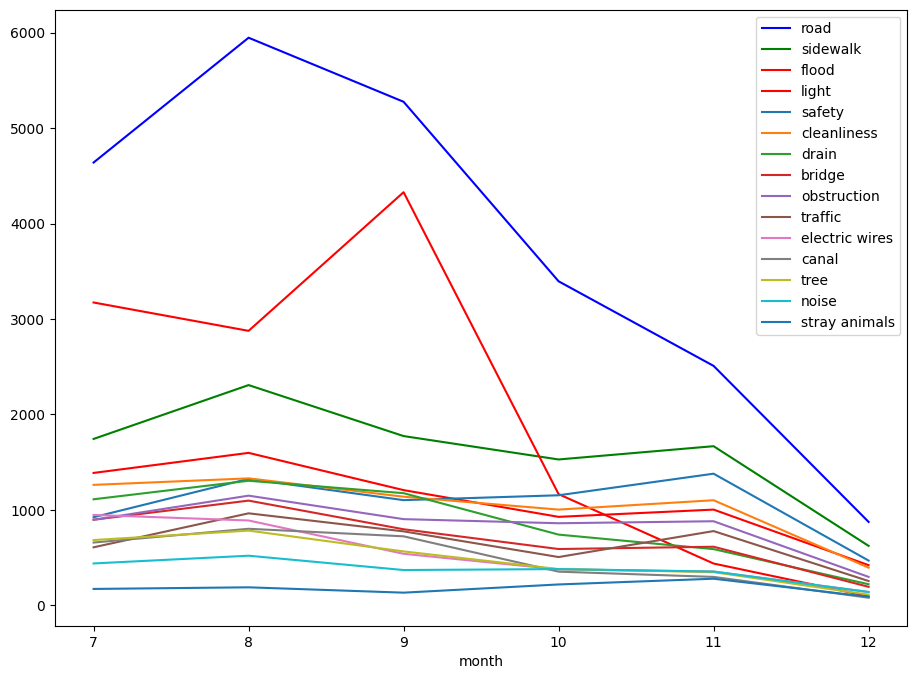

In [98]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

dims = (11, 8)
fig = plt.subplots(figsize=dims)
ax = plt.gca()

#data=df_types
df_types.plot(kind='line',x='month',y='road', color='blue',ax=ax)
df_types.plot(kind='line',x='month',y='sidewalk', color='green',ax=ax)
df_types.plot(kind='line',x='month',y='flood', color='red', ax=ax)
df_types.plot(kind='line',x='month',y='light', color='red', ax=ax)
df_types.plot(kind='line',x='month',y='safety',  ax=ax)
df_types.plot(kind='line',x='month',y='cleanliness', ax=ax)
df_types.plot(kind='line',x='month',y='drain',  ax=ax)
df_types.plot(kind='line',x='month',y='bridge',  ax=ax)
df_types.plot(kind='line',x='month',y='obstruction',  ax=ax)
df_types.plot(kind='line',x='month',y='traffic',  ax=ax)
df_types.plot(kind='line',x='month',y='electric wires',  ax=ax)
df_types.plot(kind='line',x='month',y='canal',  ax=ax)
df_types.plot(kind='line',x='month',y='tree',  ax=ax)
df_types.plot(kind='line',x='month',y='noise',  ax=ax)
df_types.plot(kind='line',x='month',y='stray animals', ax=ax)

plt.show()